In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Thursday 31 August 2023, 11:48:26  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Computer Algebra System with Python (pCAS) in a nutshell
<div class="rq">

This Python computer lab assumes a very basic knowledge of a programming language, algorithm development and a decent mathematical background. Most examples require knowledge lower than a calculus level, and some require knowledge at a calculus level.

**To run the content of a Python cell:** click on a cell to select it. Then press SHIFT+ENTER on your keyboard, or press the play button in the top left corner of this window

<img src="MiscImages/ToolbarJupyterNotebook.svg" style="margin-left:auto; margin-right:auto; display: block; width:300px" id="img_TBJN" alt="Jupyter notebook toolbar"/>

<br>
If you click on a text cell by accident, you will see the so-called markdown coding of this cell (it is closely related to the HTML language). The corresponding formatted text/images/tables will be rendered by running the cell (SHIT-ENTER or play button).
<br>
<br>
    
**Ready?** Put down your mobile phone &#x1F4F5;, please, and let's enter into the CAS with Python realm. &#x1F451;&#x1F451;

</div>

## Introduction

### What is a Computer Algebra System?

<div class="intro">

A [computer algebra system (CAS)](https://en.wikipedia.org/wiki/Computer_algebra_system) is a software program that facilitates symbolic mathematics. The core functionality of a CAS is the manipulation of mathematical expressions in symbolic form.

For example, a CAS is able to provide the symbolic first derivative of any function, such as $f(x)=3x^2-6x+7$, *i.e.* $df/dx = 6x-6$. 

The main functionalities of a CAS software are:
- Automatic simplification of regular expressions, including those expressed with variables *x*, *y*, *t*, ...
- Partial and total differentiation
- Integral calculation
- Solution of linear equations
- Manipulation of series
- Matrix operations
- Numeric operations with arbitrary-precision
- Plotting graphs of functions written in symbolic form
- ...

</div>

### Why CAS with Python?

<div class="intro">

If you already know Python, it is much easier to get started with a python CAS library, because you already know the syntax -- and if you don’t know Python, it is really easy to learn. Moreover, we will see later that it is possible to mix symbolic algebra with numerical approaches, using the numerous python libraries for scientific applications. 

</div>

### Which pCAS library?

<div class="intro">
    
<img src="./MiscImages/sympylogo.png" alt="sympy logo" width=150px/>
     
We will use SymPy. It is a Python library for symbolic mathematics which aims is to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. It is written entirely in Python. It can compete directly with commercial alternatives such as Mathematica.

Let's cite the conclusion of the seminal SymPy article (Meurer A *et al.* (**2017**) SymPy: symbolic computing in Python. *PeerJ Computer Science* **3**: e103, [link](https://doi.org/10.7717/peerj-cs.103)):

*`Sympy` include functions for assuming and deducing common mathematical facts, simplifying expressions, performing common calculus operations, manipulating polynomials, pretty printing expressions, solving equations, and representing **symbolic matrices**. Other supported facilities include discrete math, concrete math, plotting, geometry, statistics, sets, series, **vectors**, combinatorics, **group theory**, code generation, **tensors**, Lie algebras, cryptography, and special functions. SymPy has strong support for arbitrary precision numerics, backed by the `mpmath` package. Additionally, SymPy contains submodules targeting certain specific physics domains, such as classical mechanics and **quantum mechanics**.*

</div>

### Introductory examples

<div class="rq">

A large part of this section is a copy-paste of the tutorial available on the [SymPy website](https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html#what-is-symbolic-computation), converted into a jupyter notebook.

</div>

#### What is Symbolic Computation?

<div class="intro">

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

Let’s take an example. Say we wanted to use the built-in Python functions to compute square roots. We might do something like this:

</div>

In [2]:
import math
math.sqrt(9)

3.0

<div class="intro">

9 is a perfect square, so we got the exact answer, 3. But suppose we computed the square root of a number that isn’t a perfect square

</div>

In [3]:
math.sqrt(8)

2.8284271247461903

<div class="intro">

Here we got an approximate result. 2.82842712475 is not the exact square root of 8 (indeed, the actual square root of 8 cannot be represented by a finite decimal, since it is an irrational number). If all we cared about was the decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that $\sqrt{8}=2\sqrt{2}$. We would have a hard time deducing this from the above result. This is where symbolic computation comes in. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left unevaluated by default

</div>

In [4]:
import sympy
sympy.sqrt(3)

sqrt(3)

<div class="intro">

Furthermore — and this is where we start to see the real power of symbolic computation — symbolic results can be symbolically simplified.

</div>

In [5]:
sympy.sqrt(8)

2*sqrt(2)

<div class="rq">

Before going further, let's get rid of the "*last-operation-show-up*" behavior with Jupyter notebooks.

</div>

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### A More Interesting Example

<div class="intro">

Symbolic computation systems, also often called computer algebra systems such as SymPy are capable of computing symbolic expressions with variables.

As we will see later, in SymPy, variables are defined using symbols. Unlike many symbolic manipulation systems, variables in SymPy must be defined before they are used.

Let us define a symbolic expression, representing the mathematical expression $x+2y$

</div>

In [7]:
import sympy as sym
x, y = sym.symbols('x y')
expr = x + 2*y
expr

x + 2*y

<div class="intro">

Note that we wrote *x* + 2\**y* just as we would if *x* and *y* were ordinary Python variables. But in this case, instead of evaluating to something, the expression remains as just *x* + 2\**y*. Now let us play around with it:

</div>

In [8]:
expr + 1
expr - x

x + 2*y + 1

2*y

<div class="intro">

Notice something in the above example. When we typed `expr - x`, we did not get $x + 2y - x$, but rather just $2*y$. The *x* and the -*x* automatically canceled one another. This is similar to how `sqrt(8)` automatically turned into $2\sqrt{2}$ above. This isn’t always the case in SymPy, however:

</div>

In [9]:
x*expr

x*(x + 2*y)

<div class="intro">

Here, we might have expected $x(x+2y)$ to transform into $x^2 + 2xy$, but instead we see that the expression was left alone. This is a common theme in SymPy. Aside from obvious simplifications like $x-x=0$ and $\sqrt{8} = 2\sqrt{2}$, most simplifications are not performed automatically. This is because we might prefer the factored form $x(x+2y)$, or we might prefer the expanded form $x^2 + 2xy$. Both forms are useful in different circumstances. In SymPy, there are functions to go from one form to the other:

</div>

In [10]:
expanded_expr = sym.expand(x*expr)
expanded_expr
sym.factor(expanded_expr)

x**2 + 2*x*y

x*(x + 2*y)

### The Power of Symbolic Computation

<div class="intro">

The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much, much more, and do it all symbolically. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or $\mathrm{\LaTeX}$), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. Here is a small sampling of the sort of symbolic power SymPy is capable of, to whet your appetite

</div>

<div class="rq">

The next command will make all further examples pretty print with unicode characters.

</div>

In [11]:
sym.init_printing(use_unicode=True)

#### Variable declaration

<div class="intro">
    
In Python, variables have no meaning until they are defined. SymPy is no different. Unlike many symbolic manipulation systems you may have used, in SymPy, variables are not defined automatically. To define variables, we must use [symbols](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html#symbols)

</div>

In [12]:
x, t, z, omega = sym.symbols('x t z omega')
x, t, z, omega

#### Substitution of variables by numbers or expressions

<div class="intro">
    
It is possible to substitute all instances of a variable or expression in a mathematical expression with some other variable or expression or value

</div>

In [13]:
x,y = sym.symbols('x y')
f1 = x**2 + 2*y
f1
f1.subs({x:10, y: 20})
f1

In [14]:
f2 = x**4 + x**2 + 10
X = sym.symbols('X')
f2.subs({x:sym.sqrt(X)})

#### Complex numbers

In [15]:
c=1+sym.sqrt(3)*sym.I
c
sym.im(c)
sym.re(c)
c.conjugate()
sym.simplify(c.conjugate()*c)
sym.arg(c)

#### Trigonometry


<div class="rq">
    
!! don't forget to use the `sin` and `exp` functions of SymPy

</div>

In [16]:
f3 = sym.cos(x)**2 - sym.sin(x)**2
f3
sym.simplify(f3)

#### Integrals and derivatives

<div class="intro">

Take the first derivative of $F_1(t) = \sin{(\omega t)}e^{-t}$

</div>

In [17]:
F1 = sym.sin(omega*t)*sym.exp(-t)
F1
sym.diff(F1, t)

<div class="intro">

Find $F_4(x)$, the primitive of  $f_4(x)=\cos(2x)$ and then compute the integral of $f_4$ in the [0,$\pi/4$] interval

Then check that the first derivative of $F_4(x)$ yields $f_4(x)$ 

</div>

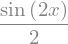

In [18]:
f4 = sym.cos(2*x)
F4 = sym.integrate(f4,x)
F4
sym.integrate(f4,(x,0,sym.pi/4))
sym.diff(F4,x)

<div class="intro">

Compute the integral of $f_5(x) = \omega e^{- t} \cos{\left(\omega t \right)} - e^{- t} \sin{\left(\omega t \right)}$

</div>

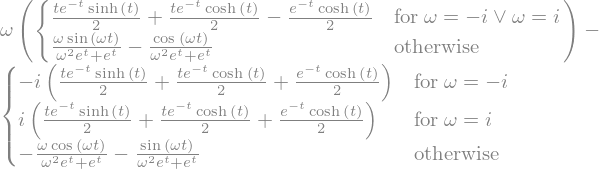

In [19]:
f5 = omega*sym.exp(-t)*sym.cos(omega*t)-sym.exp(-t)*sym.sin(omega*t)
f5
F5 = sym.integrate(f5,t)
F5

<div class="rq">

The integral has nothing to do with the expected result, *i.e.* $\sin{(\omega t)}e^{-t}$

**Why?** because we have forgotten to assume that $\omega$ is a positive variable

Let's run again the whole process after the proper initialization for $\omega$

</div>

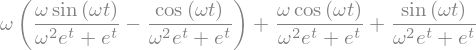

In [20]:
x, t, z = sym.symbols('x t z')
omega = sym.symbols('omega',positive=True)
x, t, z, omega
f5 = omega*sym.exp(-t)*sym.cos(omega*t)-sym.exp(-t)*sym.sin(omega*t)
f5
F5 = sym.integrate(f5,t)
F5
sym.simplify(F5)

<div class="intro">

Compute $\int_{-\infty}^\infty \sin{(x^2)}\,dx$

</div>

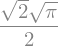

In [21]:
sym.integrate(sym.sin(x**2), (x, -sym.oo, sym.oo))

#### Solvers

<div class="intro">

Solve $x^2-2=0$ and $x^2+2=0$

</div>

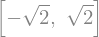

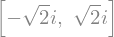

In [22]:
sym.solve(x**2 - 2, x)
sym.solve(x**2 + 2, x)

<div class="intro">

Solve $3x^2-2=a$

</div>

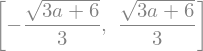

In [23]:
a = sym.symbols('a')
f3=3*x**2-2
sym.solve(sym.Eq(f3,a),x)

#### Differential equations

<div class="intro">

Solve the differential equation $y'' - y = e^t$

</div>

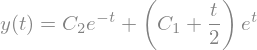

In [24]:
y = sym.Function('y')
sym.dsolve(sym.Eq(y(t).diff(t, 2) - y(t), sym.exp(t)), y(t))

#### Matrix algebra

##### Basic operations

<div class="intro">

To make a [matrix in SymPy](matrixhttps://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html), use the `Matrix` object. A matrix is constructed by providing a list of row vectors that make up the matrix. For example, to construct the matrix
$$\begin{split}\left[\begin{array}{cc}1 & -1\\3 & 4\\0 & 2\end{array}\right]\end{split}$$

use:
</div>

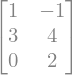

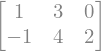

In [25]:
M = sym.Matrix([[1, -1], [3, 4], [0, 2]])
M
M.T

M Matrix


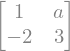

N Matrix


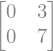

M+N


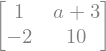

M x N


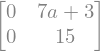

3 x M


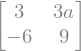

M^2


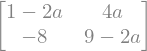

M-1


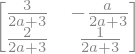

det(M)


In [26]:
a = sym.symbols('a',positive=True)
M = sym.Matrix([[1, a], [-2, 3]])
print("M Matrix")
M
N = sym.Matrix([[0, 3], [0, 7]])
print("N Matrix")
N
print("M+N")
M + N
print("M x N")
M*N
print("3 x M")
3*M
print("M^2")
M**2
print("M-1")
M**-1
print("det(M)")
M.det()

<div class="intro">

Find the eigenvalues of $\left[\begin{smallmatrix}0 & 1\\-2 & -3\end{smallmatrix}\right]$ and the  store the first eigenvalue in a variable

</div>

In [27]:
ev = sym.Matrix([[0, 1], [-2, -3]]).eigenvals()
ev
a = list(ev)[0]
a

<div class="rq">

`eigenvals()` actually returns a [python dictionary](https://realpython.com/python-dicts/). 

In the previous `list(ev)[0]` command, keys of the `ev` dictionary are converted into a list, which first item is then addressed 

The next cell illustrates how to address keys and values of a dictionary:

</div>

In [28]:
for item in ev:
    for key, value in ev.items():
        print("eigenvalue:",key,"  degeneracy:",value)

eigenvalue: -1   degeneracy: 1
eigenvalue: -2   degeneracy: 1
eigenvalue: -1   degeneracy: 1
eigenvalue: -2   degeneracy: 1


##### HMO

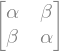

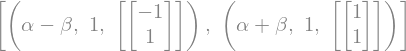

In [29]:
alpha = sym.Symbol('alpha')
beta = sym.Symbol('beta', negative=True)
H = sym.Matrix([[alpha, beta],
                [beta, alpha]
               ])
H
MO = H.eigenvects()
# list of tuples
MO

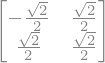

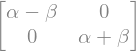

In [30]:
P, D = H.diagonalize(sort=True, normalize=True)
P
D

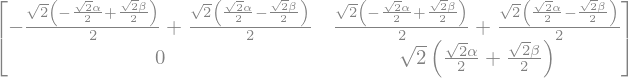

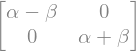

In [31]:
M=P**-1*H*P
M
sym.simplify(M)

#### $\mathrm{\LaTeX}$

<div class="intro">

It is also possible to convert SymPy equations into $\mathrm{\LaTeX}$ code . Let's do that, using the [`Integral` class](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.integrals.Integral), which represents an unevaluated integral and has some methods that help in the integration of an expression

</div>

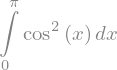

\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


In [32]:
F6 = sym.Integral(sym.cos(x)**2, (x, 0, sym.pi))
F6
eq6 = sym.latex(F6)
print(eq6)

<div class="intro">

Let's check the validity of the  $\mathrm{\LaTeX}$ code

</div>

In [33]:
from IPython.display import display, Latex
display(Latex(f"${eq6}$"))

<IPython.core.display.Latex object>

<div class="intro">

Now let's actually calculate the $\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx$ integral, with the `doit()` function of the `Integral` class

</div>

In [34]:
F6.doit()

#### Migration from symbolic computations toward numerical analysis: "lambdification"

<div class="intro">

The [`lambdify ` module](https://docs.sympy.org/latest/modules/utilities/lambdify.html) provides convenient functions to transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast.

If not specified, modules defaults to:

- `scipy`, `numpy` if SciPy is installed
- `numpy` if only NumPy is installed
- `math`, `mpmath`, `sympy` if neither is installed.

That is, SymPy functions are replaced as far as possible by either `scipy` or `numpy` functions if available, and Python’s standard library `math`, or `mpmath` functions otherwise

</div>

<div class="intro">

To call a function like `f(x)` then `[x]` should be the first argument to `lambdify`

</div>

In [37]:
x = sym.symbols('x')
# the _ symbol is a rule adopted by the author, to make a difference between a SymPy variable or function, XX, and its numerical counterpart, _XX
f = x + 1
_f = sym.lambdify([x], f)
for _x in [1,2,3,4,5]:
    print(_x,_f(_x))

1 2
2 3
3 4
4 5
5 6


<div class="intro">

To call a function like `f(x, y)` then `[x, y]` will be the first argument of `lambdify`

</div>

In [36]:
y = sym.symbols('y')
f = x + y
_f = sym.lambdify([x, y], f)
for _x in [1,2,3,4,5]:
    print(_x,_f(_x,-1))

1 0
2 1
3 2
4 3
5 4


<div class="intro">

Let's consider a more advanced example

</div>

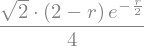

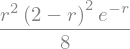

<function _lambdifygenerated(r)>

<function _lambdifygenerated(r)>

Text(0.5, 0, '$r$ / bohr')

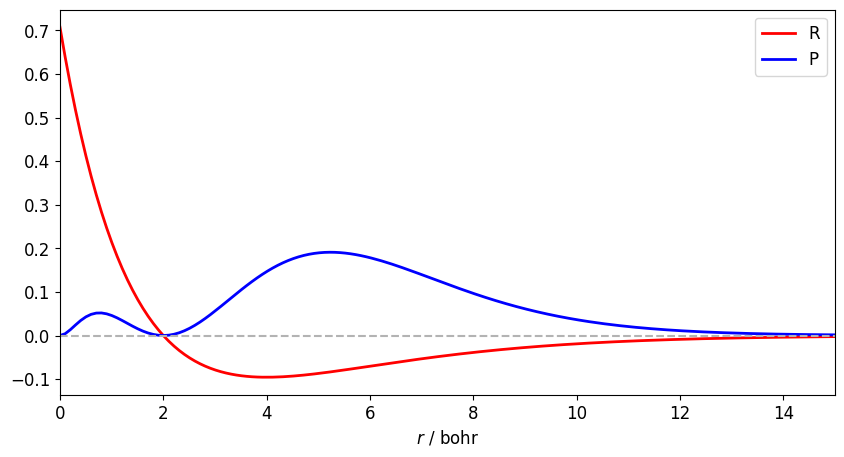

In [38]:
import numpy as np
import matplotlib.pyplot as plt

r = sym.symbols('r')
R = sym.sqrt(2)*(2-r)*sym.exp(-r/2)/4
P = (r*R)**2
R
P

_R = sym.lambdify([r],R)
_P = sym.lambdify([r],P)
_R
_P

_r = np.linspace(0.,25.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_r, _R(_r),linewidth=2,color='red',label="R")
plt.plot(_r, _P(_r),linewidth=2,color='blue',label="P")
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlim(0,15)
plt.xlabel("$r$ / bohr")
plt.legend()
plt.show()

## Physical Chemistry with SymPy

The [`Physics` module](https://docs.sympy.org/latest/reference/public/physics/index.html) of SymPy helps solving problems in physics and physical chemistry. 

In [40]:
vID.end(cwd0)

**End at:** Thursday 31 August 2023, 11:54:29  
**Duration:** 00:06:03 571ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>